Deepak Kumar (V00889149)

# Support Vector Machine Implementation

In this notebook , I have implemented basic Support vector machine using convex optimization and plotted decision hyperplane and support vector boudries. I have not used any Scikit learn library for this purpose.

In [39]:

import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
%matplotlib inline

In [40]:
class SVM:
    def __init__(self):
        self.colors = {1:'g',-1:'c'}
        self.fig= plt.figure()
        self.ax =self.fig.add_subplot(1,1,1)
    
    #train the data
    def fit(self,X):
        self.X= X
        fulldata = []
        #for storing optimoized value of [w,b]
        optimize_d = {}

        transforms = [[1,1],
                     [-1,1],
                     [-1,-1],
                     [1,-1]]

        
        #loop for taking all the data values in a list
        for yi in self.X:
            for datapoints in self.X[yi]:
                for xi in datapoints:
                    fulldata.append(xi)

        self.max_x = max(fulldata) # maximum value in data
        self.min_x = min(fulldata) # minimum value in data
        fulldata= None
        
        #Step sizes for optimation
        step_sizes = [self.max_x * 0.1,
                      self.max_x * 0.01,
                      self.max_x * 0.001
                     ]
        b_range_multiple = 2
        b_multiple = 5

        latest_optimum= self.max_x * 10
        
        #loop for each step sizes
        for step in step_sizes:
            #take latest_optimum value as w for next looop
            w= np.array([latest_optimum,latest_optimum])
            IsOptimized = False
            
            while not IsOptimized:
                for b in np.arange(-1*(self.max_x*b_range_multiple),
                                  self.max_x*b_range_multiple,
                                  step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        
                        for i in self.X:
                            for xi in self.X[i]:
                                yi=i
                                #Yi(w*xi+b) <1
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option= False

                        if found_option:
                            optimize_d[np.linalg.norm(w_t)]= [w_t,b]

                if w[0] <0: # when w is less than zero optimization is done
                    IsOptimized= True 
                    print('optimized')
                    
                else :
                    w = w - step #reduce w by step in stepsize
                    
            norms= sorted([n for n in optimize_d])
            optimum_choice = optimize_d[norms[0]]
            self.w = optimum_choice[0]
            self.b = optimum_choice[1]
            latest_optimum= optimum_choice[0][0]+step*2

    #predict label for data    
    def predict(self,X):
        #sign(x.w+b)
        classification = np.sign(np.dot(np.array(X),self.w)+self.b)

        if classification !=0 :
            self.ax.scatter(X[0],X[1],s=150, marker="+", c=self.colors[classification] )

        return classification

    #function to plot hyperplanes
    def visualiz(self):
        [[self.ax.scatter(x[0],x[1],s=100, color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        #return scaler value for hyperplane
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v)/w[1]

        datarange = (self.min_x, self.max_x)
        hyp_x_min=datarange[0]
        hyp_x_max=datarange[1]

        #positive suppport vector hyperplane
        positiveSV1=hyperplane(hyp_x_min,self.w,self.b,1)
        positiveSV2=hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[positiveSV1,positiveSV2],'b--')

        #negative suppport vector hyperplane
        negativeSV1=hyperplane(hyp_x_min,self.w,self.b,-1)
        negativeSV2=hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[negativeSV1,negativeSV2],'r--')


        #decision boundry hyperplane
        decisionboundary1=hyperplane(hyp_x_min,self.w,self.b,0)
        decisionboundary2=hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[decisionboundary1,decisionboundary2],)

        plt.show()



optimized
optimized
optimized


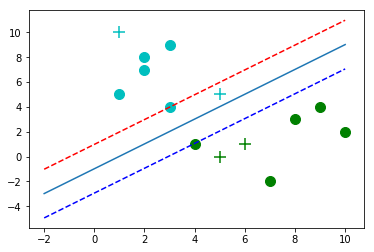

In [42]:
#data contains two classes -1,1 and two features
data_dict={-1:np.array([[1,5],
                       [3,9],
                       [2,7],
                       [3,4],
                       [2,8]]),
          1:np.array([[4,1],
                     [7,-2],
                    [8,3],
                     [9,4],
                     [10,2]])}


clf=SVM()
clf.fit(data_dict)
pre =[[1,10],
     [5,0],
     [5,5],
     [6,1],]
np_pre=np.array(pre)
for p in pre:
    clf.predict(p)
clf.visualiz()
